# Homework 5: Statistical physics of a rubber band
 **Due Friday, November 13**  
 
*Alfredo Gonzalez*

### Homework checklist

Before submitting, make sure that you

- Fill in your name in the space above
- Cite any resources that you used while working on this homework
- 1.a. Fill in the code to compute average length
- 1.b. Compute the variance of the length
- 2.a. Write your expectations
- 2.b. Fill in code to run the Monte Carlo sampling
- 2.b. Explain your results
- 3.a. Fill in code to compute the probabilities
- 3.b. Repeat the Monte Carlo sampling with new parameters
- 4.a. Fill in code to compute the average length
- 4.b. Compute the "baseline" spring constant
- 4.c. Compute the spring constant when the band has more links
- 4.c. Interpret your results
- 4.d. Compute the spring constant when the temperature is higher
- 4.d. Interpret your results

## Discussion

In classical mechanics we learn about [Hooke's law](https://en.wikipedia.org/wiki/Hooke%27s_law),  

$$
F = - k \Delta x
$$  

which describes the restoring force on a spring that is stretched by a distance $\Delta x$ away from its equilibrium point. In this homework assignment, we'll develop a simple statistical model of a "rubber band," which acts like a spring under small displacements.

Let's imagine that our rubber band is described microscopically by $N$ links that can be oriented along a long axis (with length $2\ell$) or a short axis (with length $\ell$). The total length of the rubber band is then 

$$
L = \sum_{i=1}^N \ell \left(1+\sigma_i\right)\,,
$$ 

where $\sigma_i$ is equal to $1$ if the $i$th link is oriented along the long axis, and $0$ if it is oriented along the short axis. When there is no external force on the band, then the energy of both states is the same.

When there is no force the probability of any configuration $\underline{\sigma} = \{\sigma_1, \sigma_2, \ldots, \sigma_N\}$ is given by the Gibbs distribution:

$$
P(\underline{\sigma}) = \frac{1}{2^N}\,,
$$

as all configurations have equal energies, and there are 2 possible states for each link (and thus $2^N$ possible configurations of all $N$ links).

## 1. The length distribution

To begin, let's consider a band with $N=5$ links, and set $\ell=1$. We want to know the probability of the different lengths that the band can have. 

We'll use [binomial coefficients](https://en.wikipedia.org/wiki/Binomial_coefficient) to make the calculation easier. The binomial coefficient

$$ \binom{n}{k} = \frac{n!}{k! (n-k)!} $$

gives the number of ways to choose $k$ elements out of a set with total size $n$. So, for example, there are $\binom{5}{1} = 5$ possible ways to have *one* open link out of *five* total links in the rubber band. We can use the package `scipy` to quickly compute binomial coefficients with the function `scipy.special.binom`.

### 1.a. Computing the average length

Fill in the code below to compute the average length of the band. Recall that this is given by

$$
\langle L(\underline{\sigma}) \rangle = \sum_{\underline{\sigma}} L(\underline{\sigma}) P(\underline{\sigma})\,.
$$

In [11]:
import scipy
from scipy import special

N   = 5  # number of links in the rubber band
ell = 1  # length scale for each link

p = 1/(2**5)


# Now let's compute the average length

avg_length = 0

for i in range(N+1):
    ell_i = ell * scipy.special.binom(N, i)
    # length of the band when i links are oriented along the long axis 
            # and N-i are oriented along the short axis
        
    p_i = p * scipy.special.binom(N, i) # number of configurations with i long/N-i short links
    
    avg_length = avg_length + (p_i * ell_i) 


print('The average length is %.1f' % avg_length)

The average length is 7.9


### 1.b. Computing the variance in the length

How different is the typical length of the band from its average, `avg_length`, which was computed above? This is quantified by the *variance* of the length:

$$
\left\langle \left(L(\underline{\sigma}) - \langle L(\underline{\sigma})\rangle\right)^2\right\rangle = \left\langle L(\underline{\sigma})^2\right\rangle - \left\langle L(\underline{\sigma})\right\rangle^2.
$$

Fill in the code below to compute the variance in the length of the band.

In [12]:
import scipy
import numpy as np

avg_length_squared = 0
# initialize average length^2


for i in range(N+1):
    ell_i = ell * scipy.special.binom(N, i)
     # length of the band when i links are oriented along the long axis 
            # and N-i are oriented along the short axis
        
    p_i = p * scipy.special.binom(N, i) # number of configurations with i long/N-i short links
    
    avg_length_squared = avg_length_squared + (p_i * (ell_i**2))
    
var_length = avg_length_squared - avg_length**2
# variance of the length of the band


print('The variance of the length is %.2f' % var_length)
print('This means that a typical configuration has a length that differs by %.2f from the average' 
      % np.sqrt(var_length))

The variance of the length is 8.36
This means that a typical configuration has a length that differs by 2.89 from the average


## 2. Extending the rubber band

### 2.a. Extrapolation

Based on problems 1.a and 1.b above, you should find that the typical length of the rubber band with $N=5$ links differs by around 15% of the average length of the band. How do you expect the size of the fluctuations relative to the average length of the band to change as we increase the number of lengths $N$? Fill in your answer in the Markdown cell below. 

*Hint*: If the answer isn't clear yet, consider experimenting with different values of $N$.

**YWe should expect the size fluctuations to become increasingly large as we increase the number of N lengths.**

### 2.b. Monte Carlo sampling for a long band

Let's consider what would happen if our rubber band was much longer -- for example, we'll consider a band with $N=100$ links. Clearly, we can't enumerate all $2^{100}\approx 10^{30}$ configurations of the band. We could cleverly do this calculation using binomial distributions, but for this problem we'll use *Monte Carlo sampling*. 

You might have noticed that the probability distribution over configurations is a **product distribution**,

$$ 
P(\underline{\sigma}) = P(\sigma_1)\times P(\sigma_2) \times \ldots \times P(\sigma_N)\,, 
$$

with

$$
P(\sigma_i=0) = P(\sigma_i=1) = \frac{1}{2}\,.
$$

This is because the orientation of each link in the band is independent of the others. Because each link is independent, we can sample random configurations from the distribution $P(\underline{\sigma})$ by sampling each of the $\sigma_i$ independently, according to $P(\sigma_i)$.

Fill in the code below to generate a random sample of configurations. We'll then use the random sample to plot the distribution of lengths that we find.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


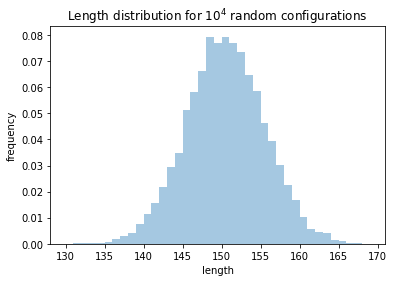

In [15]:
import numpy
import seaborn as sns
import matplotlib.pyplot as plt

N = 100 # number of links

p_long               = 1/2
# probability of a long link
p_short              = 1/2
# probability of a short link
length_probabilities = [p_short, p_long] # probability of a short or a long link
possible_lengths     = [    ell,  2*ell] # each link in the band can have length ell (short axis) or 2*ell (long axis)

n_configs      = 10000 # randomly sample 10000 configurations
sample_lengths = []    # store the length for each random configuration here

for i in range(n_configs):
    random_lengths = numpy.random.choice(possible_lengths, p=length_probabilities, size=N)
    total_length   = np.sum(random_lengths)
    sample_lengths.append(total_length)
    
sns.distplot(sample_lengths, bins=np.arange(130, 170, 1), norm_hist=True, kde=False)
plt.title(r'Length distribution for $10^4$ random configurations')
plt.xlabel('length')
plt.ylabel('frequency');

Explain the length distribution in the Markdown cell below. Does the average length agree with your expectation?

**The average length of the graph agrees with our expectation as we would expect a graph that is bell shaped.**

## 3. Stretching the rubber band

Now let's imagine that we induce the rubber band to stretch by making the energy of a link decrease slightly when it's in the long orientation instead of the short one. We can model this by introducing a new energy function,

$$
E(\underline{\sigma}) = -\sum_{i=1}^N \epsilon \sigma_i\,.
$$

Recall that $\sigma_i=1$ if the $i$th link is oriented along the long axis, and $\sigma_i=0$ if it is oriented along the short axis. This is like "pulling" on the rubber band with a force 

$$
F = -\frac{dU}{dx} = \frac{\epsilon}{\ell}\,,
$$ 

because the energy decreases by $\epsilon$ every time the band increases by $\ell$ in length.

Once again, the distribution for $P(\underline{\sigma})$ is a product distribution because there is no interaction between the links. The goal of this section is to figure out how much the rubber band stretches, depending on how much energy we put into it.

### 3.a. Finding the probability distribution for $\sigma_i$

Because $P(\underline{\sigma})$ is again a product distribution, we can compute the length distribution of the band again using the same approach as in problem 2.b. We'll do this in a number of steps. First, let's find the probability for each link to be aligned along the short or long axis as a function of the energy bias $\epsilon$.

Fill in the code below to compute the probabilities.

In [23]:
# Ignoring the rest of the system, what is the energy of a single link in the long and short orientations?

def get_probabilities(epsilon, T):
    """ Returns the probability of a single link in the band to be oriented along the short axis
        or the long axis, as a function of the energy bias epsilon and the temperature T """
    
    E_long  = -epsilon
    E_short = 0
    Z       = np.exp( -E_long/T) + np.exp(-E_short/T)
    
    p_long  = np.exp( -E_long/T) / Z
    p_short = np.exp(-E_short/T) / Z
    
    return p_long, p_short

### 3.b. Monte Carlo sampling from the length distribution

Copy your code from problem 2.b and paste it in the cell below plot the length distribution for the rubber band when $\epsilon=0.2$ and $T=1$. As in problem 2.b, we'll assume that we have $N=100$ links in our rubber band.

**Note: we have to replace the previous values of `p_long` and `p_short` to get the correct answer.**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


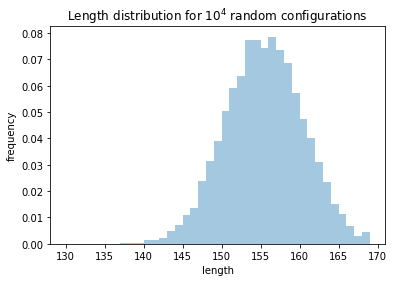

In [24]:
# Get p_long and p_short for this value of epsilon and T!

p_long, p_short = get_probabilities(epsilon=0.2, T=1)

import numpy
import seaborn as sns
import matplotlib.pyplot as plt

N = 100 # number of links


length_probabilities = [p_short, p_long] # probability of a short or a long link
possible_lengths     = [    ell,  2*ell] # each link in the band can have length ell (short axis) or 2*ell (long axis)

n_configs      = 10000 # randomly sample 10000 configurations
sample_lengths = []    # store the length for each random configuration here

for i in range(n_configs):
    random_lengths = numpy.random.choice(possible_lengths, p=length_probabilities, size=N)
    total_length   = np.sum(random_lengths)
    sample_lengths.append(total_length)
    
sns.distplot(sample_lengths, bins=np.arange(130, 170, 1), norm_hist=True, kde=False)
plt.title(r'Length distribution for $10^4$ random configurations')
plt.xlabel('length')
plt.ylabel('frequency');



## 4. Surprising "spring" properties

Now, we'll compute the "spring constant" of the rubber band, which is valid for small displacements/pulling forces. Above we noted that setting the energy of the long state to $-\epsilon$ is like pulling on the rubber band with a force $\epsilon/\ell$. As the rubber band stretches it resists this pulling, until equilibrium is reached when

$$
F_{\rm pull} + F_{\rm spring} = \frac{\epsilon}{\ell} - k \Delta L = 0\,.
$$

Thus, to find the spring constant $k$ we can compute the change in the length of the band $\Delta L$ for some (small) value of $\epsilon$ and divide,

$$
k = \frac{\epsilon}{\ell \times \Delta L}\,.
$$

### 4.a. Computing the average length

Because $P(\underline{\sigma})$ is a product distribution, the average length of the band is

$$
\langle L(\underline{\sigma}) \rangle = N \sum_{\sigma\in\{0,1\}} (1+\sigma) \ell P(\sigma)\,.
$$

You already computed $P(\sigma)$ with your function `get_probabilities` in problem 3.a. $P(\sigma=1)$ is `p_long` and $P(\sigma=0)$ is `p_short`. Using the `get_probabilities` function, fill in the code below to find the average length of a band with $N$ links, at temperature $T$, with the energy of the long orientation given by $-\epsilon$.

In [31]:
def get_length(N, epsilon, T):
    """ Returns the average length of the band with N links at temperature T,
        when the energy of the long orientation is epsilon lower than the short one. """
    
    p_long, p_short = get_probabilities(epsilon, T)
    
    avg_length = N * (2*ell*p_long + 1*ell*p_short)
    return avg_length

### 4.b. The spring constant

Now, we'll choose a small $\epsilon=0.01$ and use the change in the length of the band to compute the spring constant. Our "baseline" value will be at $N=100$ and $T=1$.

Fill in the code below to compute the spring constant.

In [32]:
N = 100 # number of links
T = 1   # temperature
epsilon = 0.01 # pulling energy

length_0 = get_length(N,       0, T) # the length of the band at rest
length_1 = get_length(N, epsilon, T) # the length of the band when it is stretched

k = epsilon / (ell * (length_1 - length_0))

print('The spring constant is %lf.' % k)

The spring constant is 0.040000.


### 4.c. Changing the number of links

How does the spring constant change if we make the band longer? Copy your code from 4.b and run it with $N=200$.

In [34]:
N = 200 # number of links
T = 1   # temperature
epsilon = 0.01 # pulling energy

length_0 = get_length(N,       0, T) # the length of the band at rest
length_1 = get_length(N, epsilon, T) # the length of the band when it is stretched

k = epsilon / (ell * (length_1 - length_0))

print('The spring constant is %lf.' % k)

The spring constant is 0.020000.


How do you interpret this result? Is the spring constant larger (i.e., stiffer), smaller (i.e., looser), or the same? Does this make sense? Fill in your answer in the Markdown cell below.

**It is smaller and directly proportional to N. We can see from the equation in part 4 describing the forces that an increase in length must be compensated by a decrease in the spring constant, so this finding does make sense.**

### 4.d. Changing the temperature

How does the spring constant change if we change the temperature? Copy your code from 4.b and run it with $T=2$.

In [35]:
N = 100 # number of links
T = 2   # temperature
epsilon = 0.01 # pulling energy

length_0 = get_length(N,       0, T) # the length of the band at rest
length_1 = get_length(N, epsilon, T) # the length of the band when it is stretched

k = epsilon / (ell * (length_1 - length_0))

print('The spring constant is %lf.' % k)

The spring constant is 0.080000.


How do you interpret this result? Is the spring constant larger (i.e., stiffer), smaller (i.e., looser), or the same? *This time, the answer might be surprising!* The reason is that the rubber band resists being pulled because of *entropy*. Our model is a very simple example of a polymer or [ideal chain](https://en.wikipedia.org/wiki/Ideal_chain). Fill in your answer in the Markdown cell below.

**The spring constant increased with an increase in temperature. We can relate T with the pull energy and thus should be directly proportional to k. **